In [1]:
#Ignorar esta parte, ela apenas serve para me lembrar o que algumas funções fazem

#numpy.random.rand:

        #A função random.rand entrega um array composto de valores entre 0 e 1 nas dimensões especificadas pelo pelo usuário
        #exemplo:
        
        #in:
        #np.random.rand(3, 2)
        #out:
        
        #array([[ 0.14022471,  0.96360618],  
        #       [ 0.37601032,  0.25528411],  
        #       [ 0.49313049,  0.94909878]])
      
#scipy.special.expit(x)

    #A função 'expit' representa no meu código a função de sigmoid
    #Link com uma melhor explicação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html
    
    
#.T = Transpose
    
    #Bem simples, apenas muda o shape do array para 'colunas'
    
#numpt.dot
    
    #É basicamente um somatório
    
#pyplot.imshow

    #Ler como "pyplot.ImageShow"

In [8]:
#IMPORTAÇÕES


#https://numpy.org/doc/stable/reference/generated/numpy.array.html


import numpy as np
import scipy.special #+ .expit=sigmoid()
import matplotlib.pyplot as pyplot
import random

In [9]:
#DEFININDO FUNÇÕES && MAIN

class RNA:
    def __init__(self, inputLayer, hiddenLayer, outputLayer, ritmo):
        
        self.input = inputLayer
        self.hidden = hiddenLayer
        self.output = outputLayer
        
        self.weightInput = (np.random.rand(self.hidden, self.input) - 0.5) #weightInicial
        self.weightOutput = (np.random.rand(self.output, self.hidden) - 0.5) #weightFinal (entregado pelo neurônio)
        

        
        
        self.rt = ritmo
        
        #Função de Ativação
        
        self.sigFunc = lambda x: scipy.special.expit(x)  #define sigmoid como a função de ativação (expit = sigmoid)
        pass
    
    def train(self, inputs_list, targets_list):
        
        #TRAINING + BACKWARD PASS
        
        inputs = np.array(inputs_list, ndmin=2).T  #ndmin = número de dimensões mínimo // transforma a lista de inputs em um array
        targets = np.array(targets_list, ndmin=2).T #Mesma coisa aqui, só que utiliando a lista de targets (valores verdadeiros)
        
        hidden_inputs = np.dot(self.weightInput, inputs) #INPUT DO NEURÔNIO = SOMATÓRIO{WEIGHT * INPUT}
        hidden_outputs = self.sigFunc(hidden_inputs) #OUTPUT DO NEURÔNIO = FUNÇÃO_DE_ATIVAÇÃO(INPUT)
        
        final_inputs = np.dot(self.weightOutput, hidden_outputs) #Inputs finais = somatório{novos_outputs * weights}
        
        final_outputs = self.sigFunc(final_inputs) #Outputs finais = função_de_ativação(Input_final)
        
        #Fim do forward-pass
        
        #início do backwards-pass
        
        
        #target = valor verdadeiro // final output = sigmoid(output) // target - finalOutput = errorRate
        output_errors = targets - final_outputs
        
        #errorRate = somatório{weights ; (output_errors
        error_rate = np.dot(self.weightOutput.T, output_errors)
        
        #Adapta o weight baseado nos outputs da última camada
        self.weightOutput += self.rt * np.dot(output_errors * final_outputs * (1.0 - final_outputs), np.transpose(hidden_outputs))
        
        #Define novo (weightInput)
        self.weightInput += self.rt * np.dot(error_rate * hidden_outputs * (1.0 - hidden_outputs), np.transpose(inputs))
        
        
    
    
        
        
        pass
    
    def query(self, inputs_list):
        
        inputs = np.array(inputs_list, ndmin=2).T #Define inputs
        
        hidden_inputs = np.dot(self.weightInput, inputs) #calcula os outputs finais, entregados pelos neurônios da 'hidden-layer'
        hidden_outputs = self.sigFunc(hidden_inputs) #Aplica sigmoid para os novos valores
        
        final_inputs = np.dot(self.weightOutput, hidden_outputs) #Calcula o input final (que vai ser entregue para a última parte da rede neural)
        final_outputs = self.sigFunc(final_inputs) #Aplica sigmoid para os valores finais 
        
        return final_outputs

In [10]:
#TREINO

x_data = open('mnist_train_100.CSV', 'r')
x_data_list = x_data.readlines()
x_data.close()

x_train = x_data_list[0]
x = x_train.split(',')
x = np.asfarray(x) #transforma os dados recebidos em um array composto por Floats
xPic = x[1:] #seleciona todos os valores -index (785 - 1 = 754), input=784 = 28px * 28px

gura = RNA(inputLayer=784, hiddenLayer=200, outputLayer=10, ritmo=0.1)

Treinos = 30
out = 10

for x in range(Treinos):
    print('treino', x+1)
    
    for y in x_data_list:
        
        x = y.split(',')
        inputs = (np.asfarray(x[1:]) / 255.0 * 0.99) + 0.01
        
        targets = np.zeros(out) + 0.01
        targets[int(x[0])] = 0.99
        gura.train(inputs, targets)

treino 1
treino 2
treino 3
treino 4
treino 5
treino 6
treino 7
treino 8
treino 9
treino 10
treino 11
treino 12
treino 13
treino 14
treino 15
treino 16
treino 17
treino 18
treino 19
treino 20
treino 21
treino 22
treino 23
treino 24
treino 25
treino 26
treino 27
treino 28
treino 29
treino 30


In [11]:
#TREINO --FIM

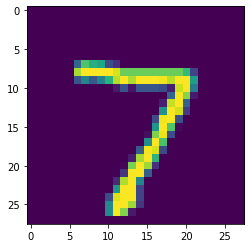

In [12]:
#DEFINE QUE IMAGEM SERÁ INTERPRETADA

x_data_file = open("mnist_test_10.csv", "r")
x_list = x_data_file.readlines()
x_data_file.close()

imgNumber = 0 #random.randrange(0, 9)

X_test = x_list[imgNumber]
X = X_test.split(',')

xPic = np.asfarray(X[1:])
pyplot.imshow(xPic.reshape(28,28))

In [13]:
inputs = (np.asfarray(X[1:]) / 255 * 0.99) + 0.01

gura.query(inputs)

array([[0.0249425 ],
       [0.00410421],
       [0.07274123],
       [0.00568364],
       [0.00252977],
       [0.01987944],
       [0.00547592],
       [0.93584903],
       [0.00414179],
       [0.04283895]])

In [14]:
notas = [] #Irá serivir para definir a porcentagem de acerto

for line in x_list: #Puxa todas as linhas (números) do arquivo csv e aplica na função
    
    X = line.split(',') #Divide os elementos do arquivo
    
    acertos = int(X[0]) #Transforma os elementos em integers (excluindo os '/n')
    
    inp = (np.asfarray(X[1:]) / 255.0 * 0.99) + 0.01 
    #Ler 'asfarray' como 'as float array' // transforma os elementos do arquivo em floats, e logo após utiliza 
    #Transforma os números recebidos (inputs) em números entre 0.1 e 1
    
    out = gura.query(inp) #output = input-processado
    
    chute = np.argmax(out) #puxa o maior número encontrado no array 'output'
    
    if (chute == acertos):  #ironmouse = lista onde será colocado os resultados 
        notas.append(1) #Quando a rna acerta o número, é adicionado o número 1 a lista 'ironmouse'
    else:
        notas.append(0) #Caso contrário, é adicionado '0'
        
notas_array = np.asarray(notas) #Transforma a lista de inteiros 'ironmouse', em um array de floats
print('Porcentagem :', notas_array.sum() / notas_array.size)

 #A performance em porcentagem é igual a soma dos elementos do array divididos pela quantidade

Porcentagem : 0.7
